<a href="https://colab.research.google.com/github/ManalZar/Financial-News-Sentimental-Analysis/blob/main/EM3_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Financial News Sentimental Analysis**

Sentiment analysis of financial news data:


**Why?** Because Stock Market is a huge gamble for some people because they are not informed with proper data to make the right decisions.

**What?** Abstractive summarization and web scrapping seems to aid more into gather the required information to make the right decisions.

Use of Sentiment Analysis in the financial sector (most common method in this domain) will be the analysis of financial news, in particular to predicting the behaviour and possible trend of stock markets. 




**Techniques?** NLP For Financial News Sentiment Analysis.

**How?** 


*   Natural language processing (NLP) subfield of the interactions between 
computers and human language, used to process and analyze large amounts of natural language data.

*   This work tries to classifying sentiment from financial news using Combination webscrapping and sentimental score, word frquencies.



1.   Webscraping modules
2.   Model






### **Web scrapping?**
Access to the most up-to-date information is vital to any investing strategy. I used BeautifulSoup to parse the news headline and timestamp for stock ***AMAZON, GOOGLE and TESLA*** from ***Finviz***, a website offers interactive graphs, fundamental ratios and financial news, etc.

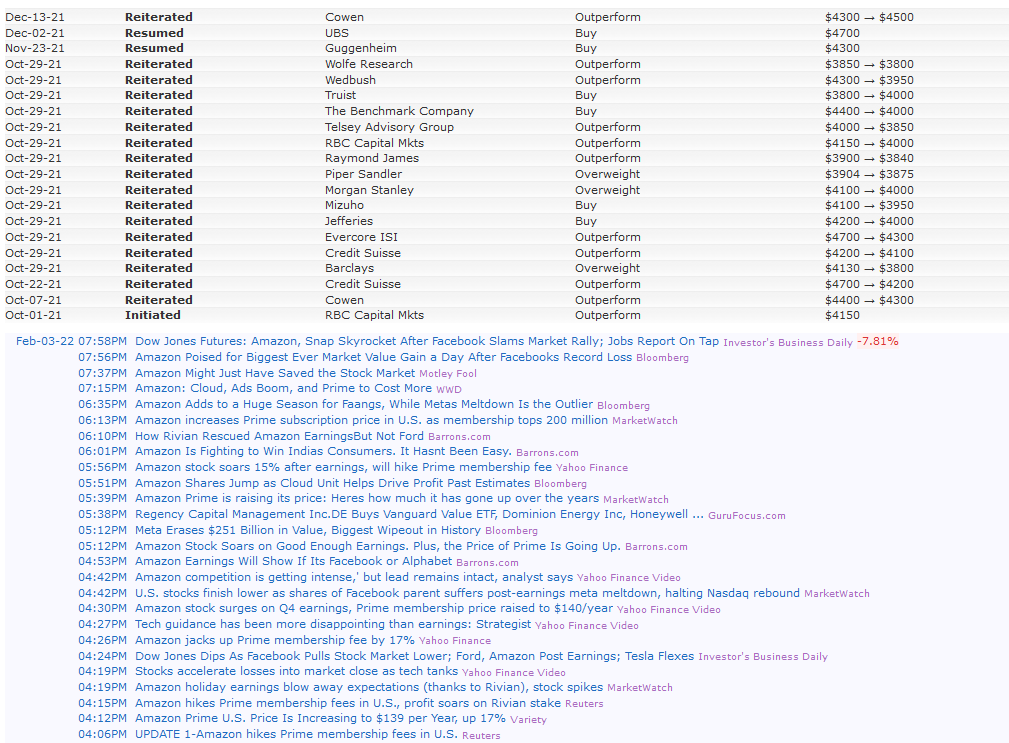

### **Word count?**
After cleaned the news headline, I conducted a little bit EDA and generate this most common word counts for all three target stocks, amazon, google and tesla. As you can see, their ticker names are keep showing up in the competitor’s most common words, which indicates that there are a lot of times they were been mentioned together in the same news as well as tesla.


**1. Amazon:**
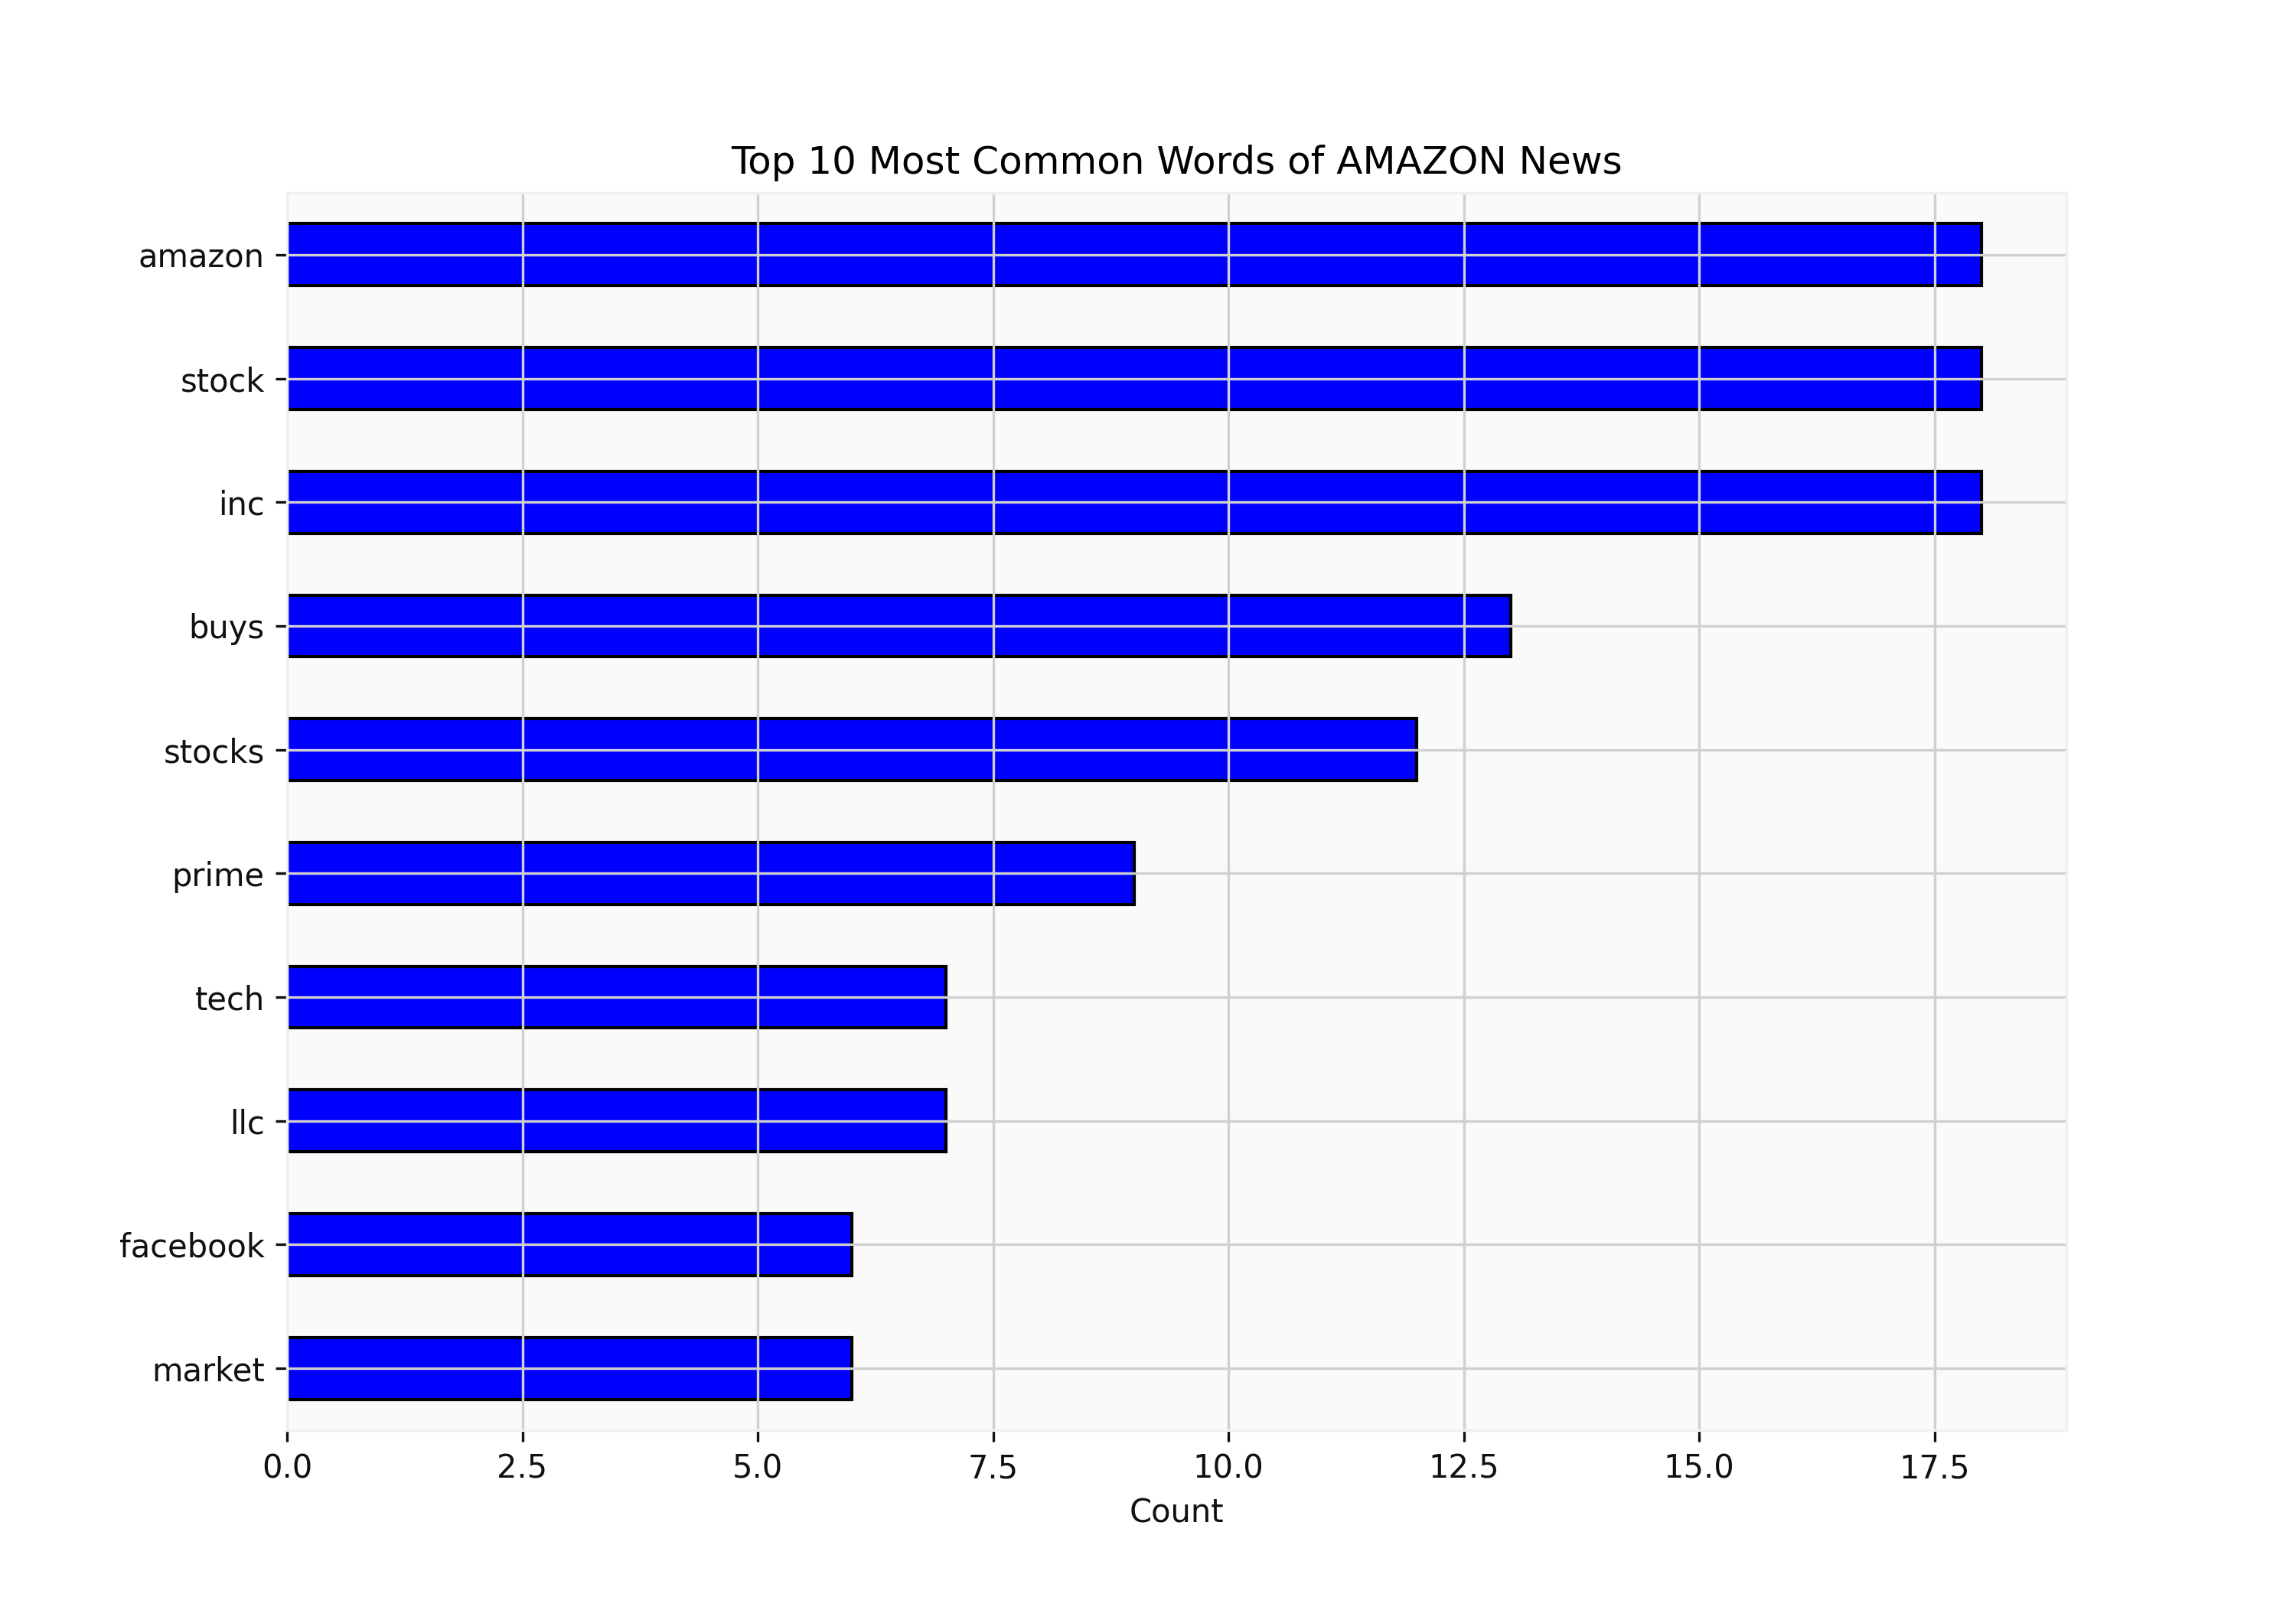

**2. Google:**
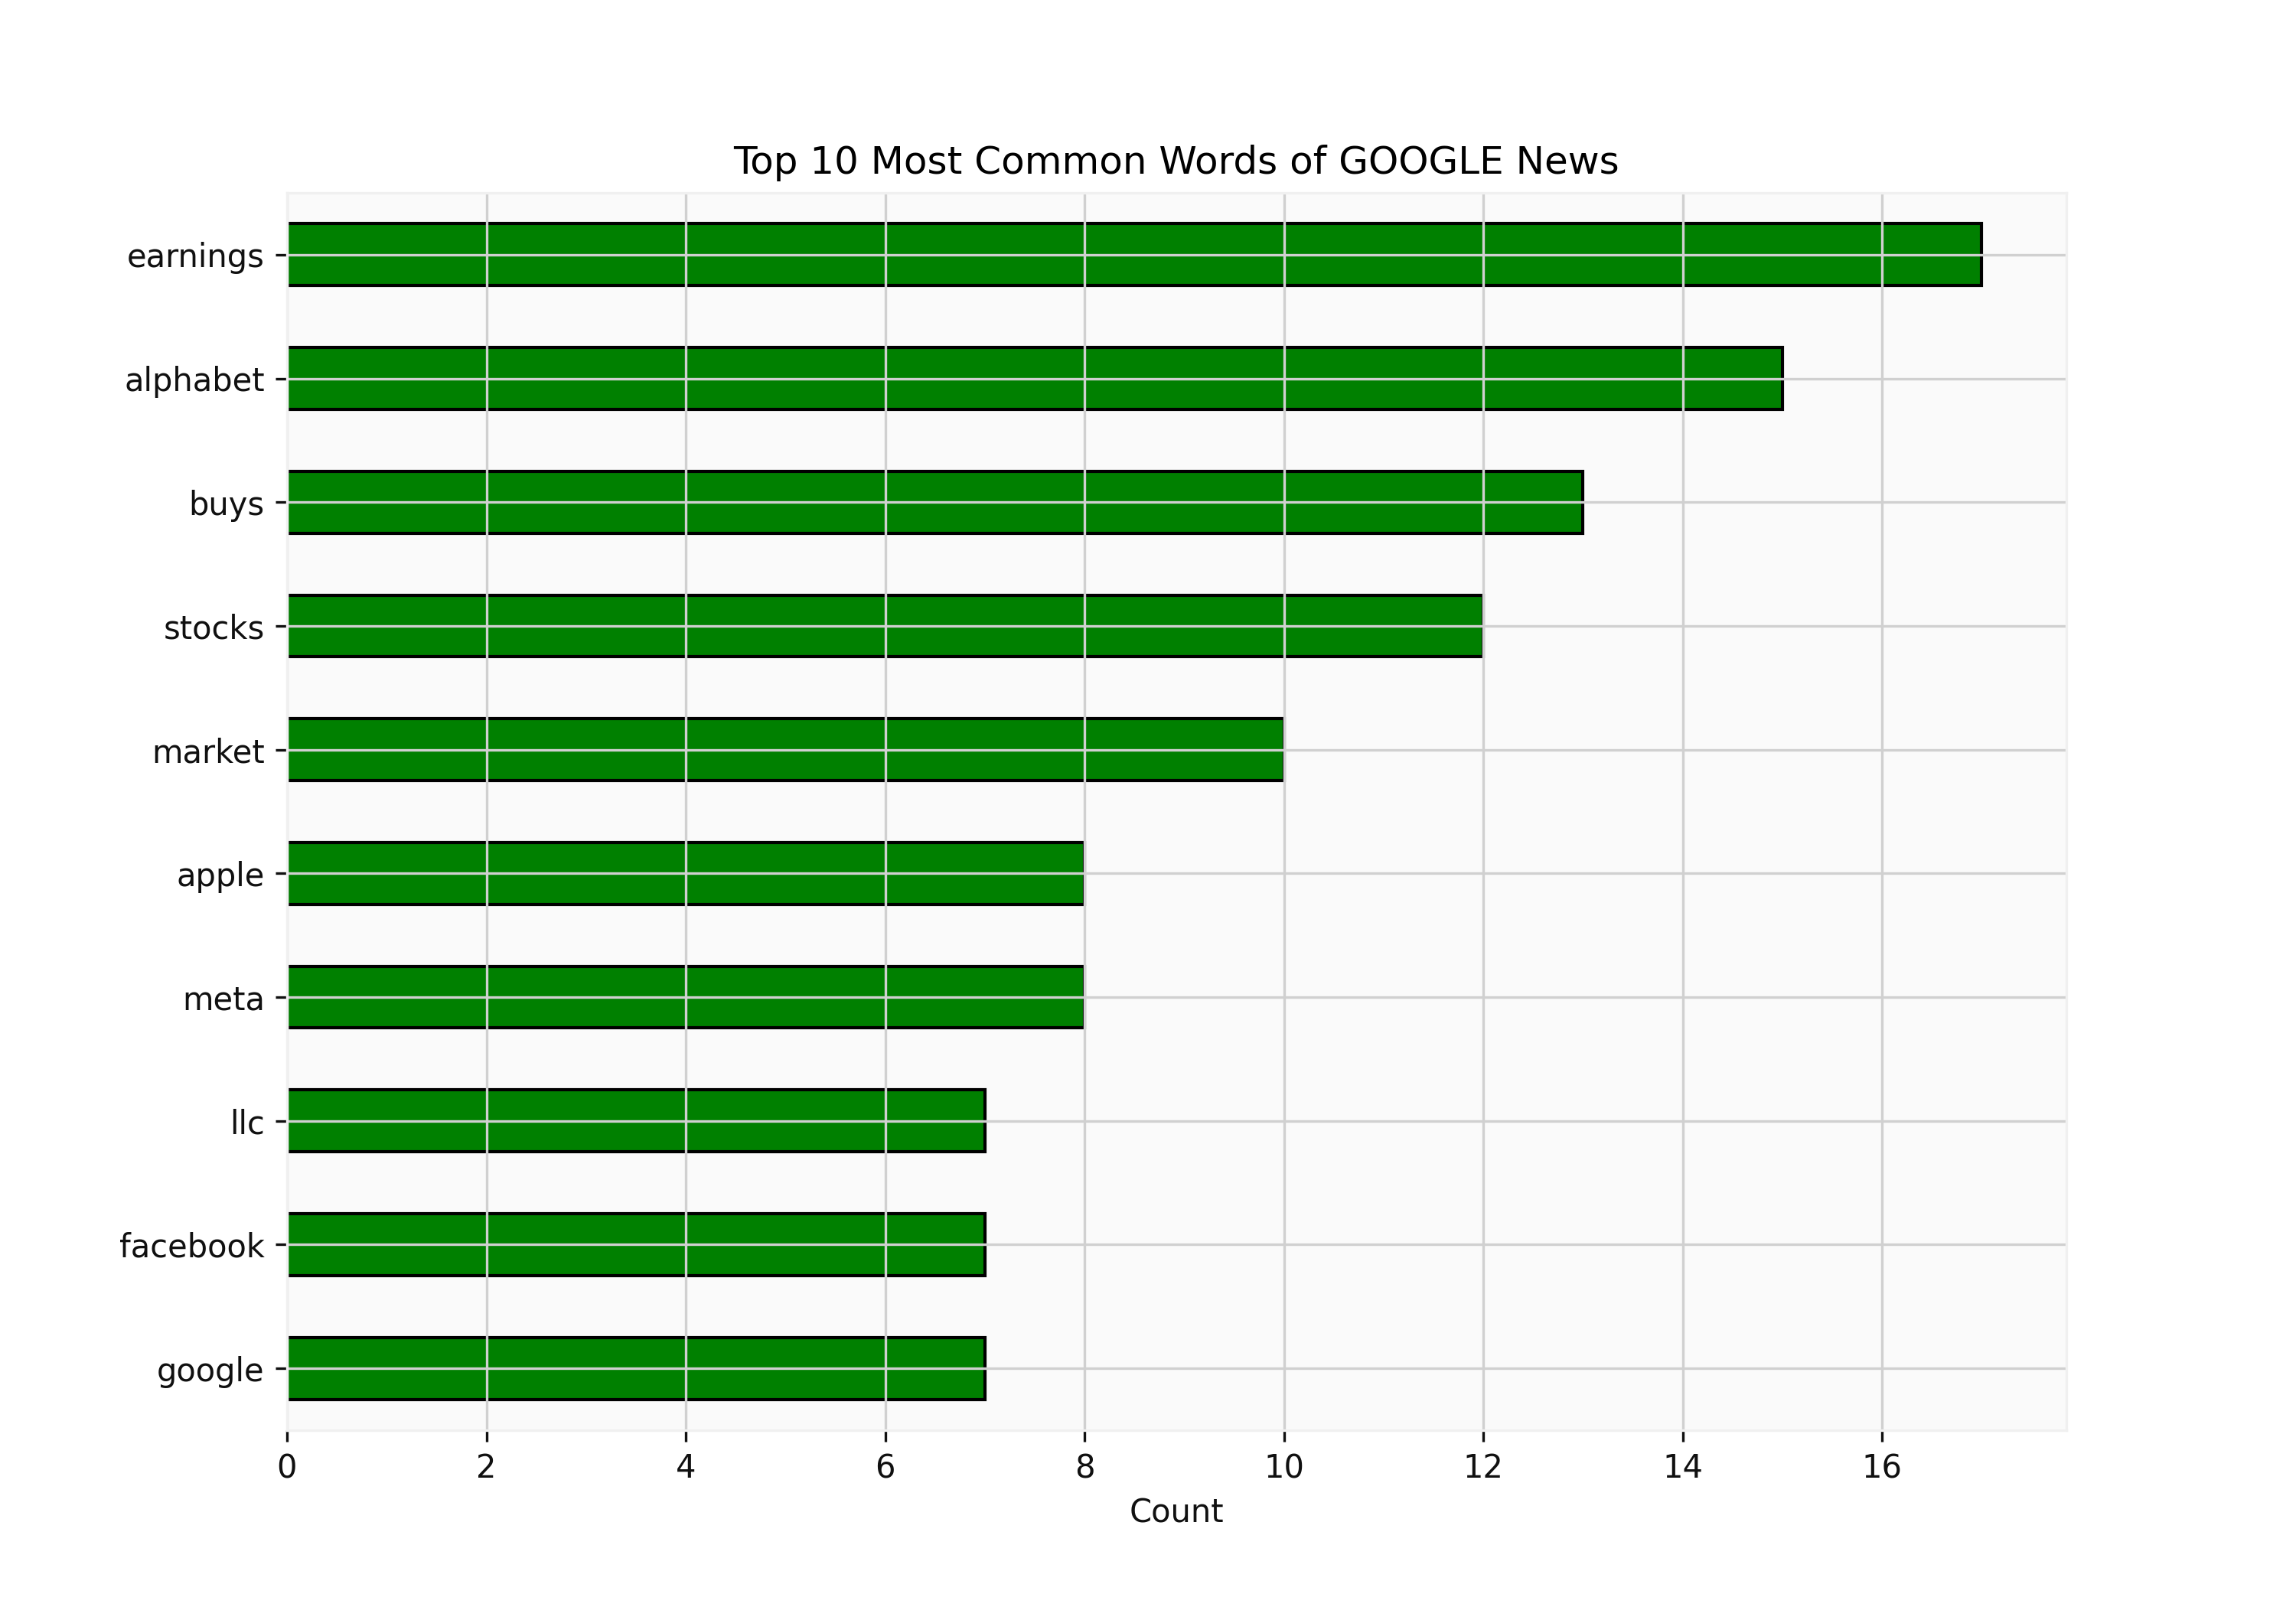

**3. Tesla:**
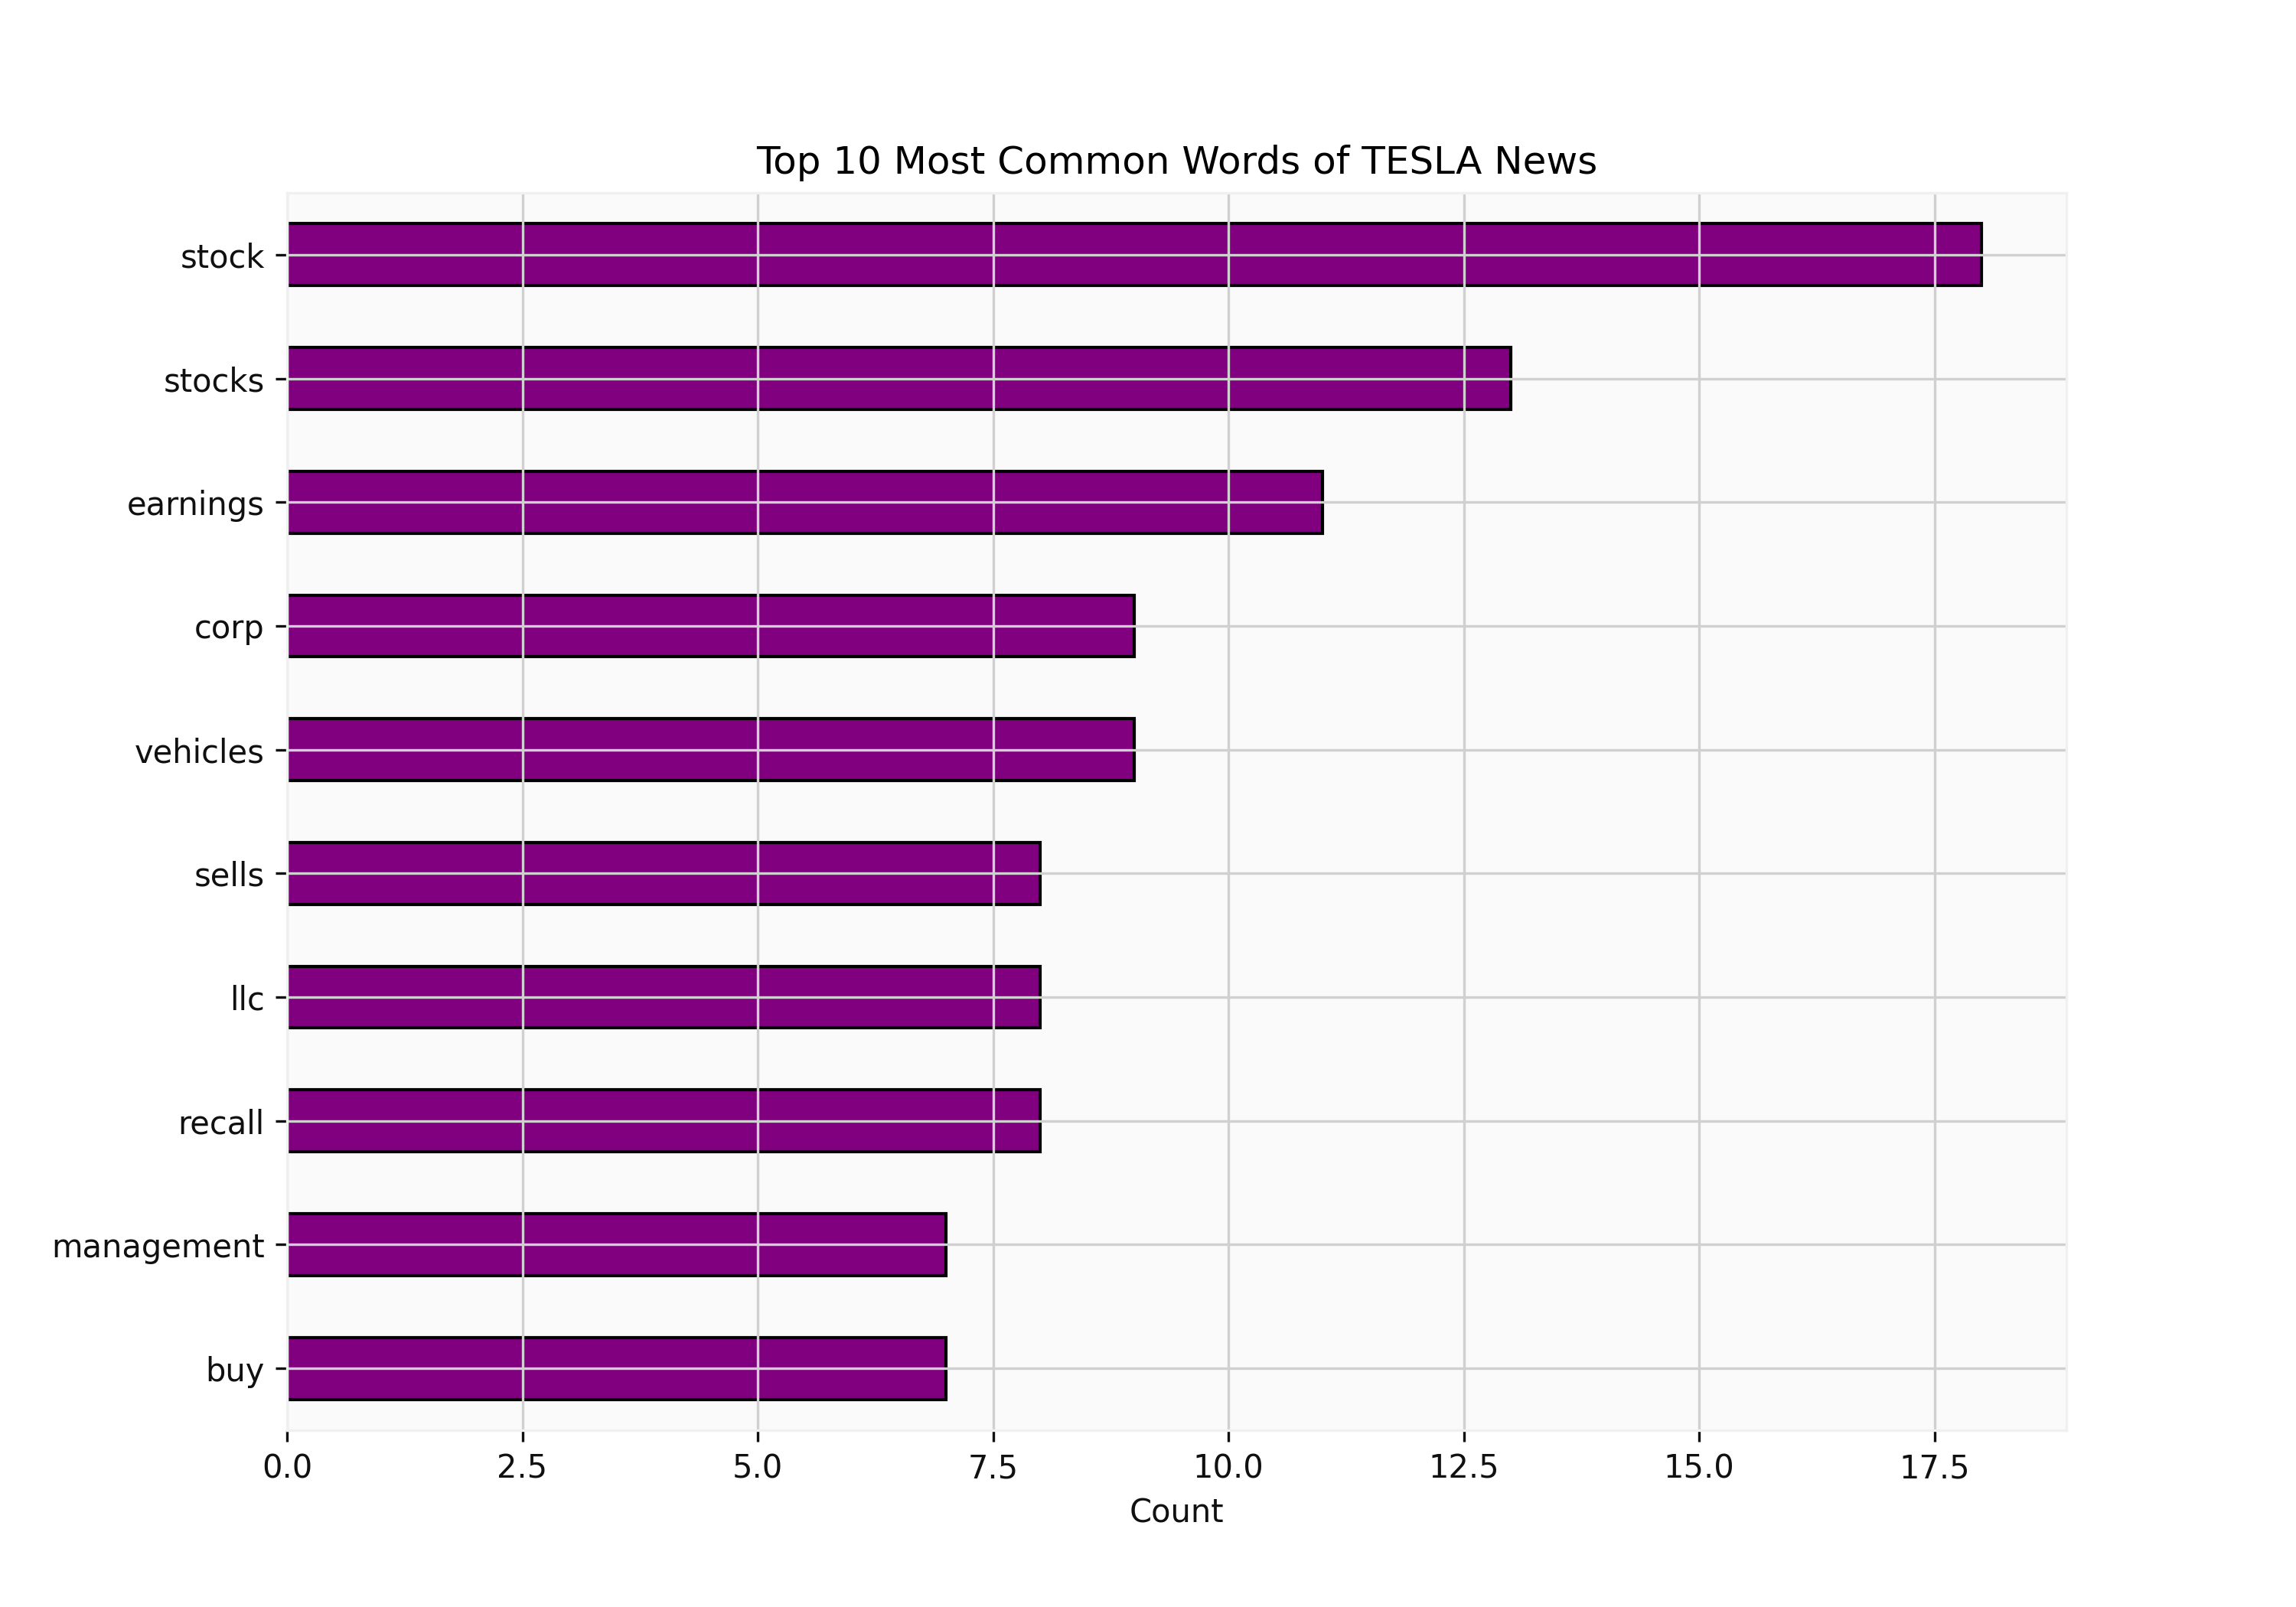

## **Imports and Needs**

In [ ]:
## First we install the potentially important packages

!pip install unidecode
!pip install word2number
!pip install contractions
!pip install bs4
!pip install nltk
!pip install inflect

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import unidecode
from word2number import w2n
import contractions
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
import inflect
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import json

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from string import punctuation
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from wordcloud import WordCloud
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDClassifier, LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

In [ ]:
# Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

finwiz_url = 'https://finviz.com/quote.ashx?t='

## **Webscrapp amazon, tesla, and google's financial news**

In [ ]:
news_tables = {}
tickers = ['AMZN', 'TSLA', 'GOOG']

for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table

In [ ]:
# Read one single day of headlines for 'AMZN' 
amzn = news_tables['AMZN']
# Get all the table rows tagged in HTML with <tr> into 'amzn_tr'
amzn_tr = amzn.findAll('tr')

for i, table_row in enumerate(amzn_tr):
    # Read the text of the element 'a' into 'link_text'
    a_text = table_row.a.text
    # Read the text of the element 'td' into 'data_text'
    td_text = table_row.td.text
    # Print the contents of 'link_text' and 'data_text' 
    print(a_text)
    print(td_text)
    # Exit after printing 4 rows of data
    if i == 3:
        break

Worried About Another Market Downturn? Here's What Investors Should Focus on Instead
Feb-09-22 05:55PM  
Disney Stock Pops As Earnings Top Amid Theme Park Revival; Disney+ Subscribers Strong
05:14PM  
Will Affirm Stock Surprise With Amazon-Driven Beat And Raise?
04:45PM  
Don't Expect Big Gains From This Stock Market Sector in 2022
04:03PM  


In [ ]:
parsed_news = []

# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])
        
parsed_news

[['AMZN',
  'Feb-09-22',
  '05:55PM',
  "Worried About Another Market Downturn? Here's What Investors Should Focus on Instead"],
 ['AMZN',
  'Feb-09-22',
  '05:14PM',
  'Disney Stock Pops As Earnings Top Amid Theme Park Revival; Disney+ Subscribers Strong'],
 ['AMZN',
  'Feb-09-22',
  '04:45PM',
  'Will Affirm Stock Surprise With Amazon-Driven Beat And Raise?'],
 ['AMZN',
  'Feb-09-22',
  '04:03PM',
  "Don't Expect Big Gains From This Stock Market Sector in 2022"],
 ['AMZN',
  'Feb-09-22',
  '03:20PM',
  'Could This Unstoppable Stock have 100% or More Upside?'],
 ['AMZN',
  'Feb-09-22',
  '02:52PM',
  'Biggest Single-Day Market Cap Drops in U.S. Stocks'],
 ['AMZN',
  'Feb-09-22',
  '02:29PM',
  "Fed 'at or approaching peak hawkishness, strategist says"],
 ['AMZN',
  'Feb-09-22',
  '02:26PM',
  'Metas Stock Slide Puts Spotlight on Tech Antitrust Bill Criteria'],
 ['AMZN',
  'Feb-09-22',
  '02:03PM',
  'Robotic delivery fleets could multiply across Atlanta, with new state regulations'],


In [ ]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['ticker', 'date', 'time', 'headline']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

parsed_and_scored_news.head()

,ticker,date,time,headline,neg,neu,pos,compound
0,AMZN,2022-02-09,05:55PM,Worried About Another Market Downturn? Here's ...,0.167,0.833,0.000,-0.2960
1,AMZN,2022-02-09,05:14PM,Disney Stock Pops As Earnings Top Amid Theme P...,0.000,0.683,0.317,0.6249
2,AMZN,2022-02-09,04:45PM,Will Affirm Stock Surprise With Amazon-Driven ...,0.000,0.792,0.208,0.2732
3,AMZN,2022-02-09,04:03PM,Don't Expect Big Gains From This Stock Market ...,0.169,0.831,0.000,-0.2584
4,AMZN,2022-02-09,03:20PM,Could This Unstoppable Stock have 100% or More...,0.184,0.816,0.000,-0.2023


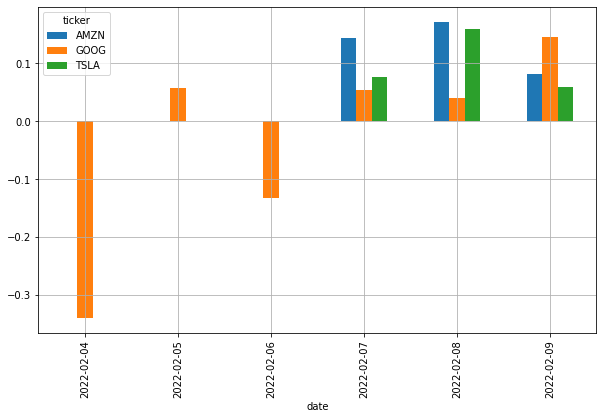

In [ ]:
plt.rcParams['figure.figsize'] = [10, 6]

# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()

# Unstack the column ticker
mean_scores = mean_scores.unstack()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()

# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar')
plt.grid()

### **Check for duplicate headlines**

In [ ]:
num_news_before = parsed_and_scored_news['headline'].count()
num_news_before

300

In [ ]:
scored_news_clean = parsed_and_scored_news.drop_duplicates(subset=['ticker','headline'])

In [ ]:
scored_news_after = scored_news_clean['headline'].count()

In [ ]:
print(f"Before we had {num_news_before} after removing duplicates we have {scored_news_after}")

Before we had 300 after removing duplicates we have 298


### **Visualizing sentiment of a stock for a single day**

In [ ]:
single_day = scored_news_clean.set_index(['ticker','date'])
single_day.head()

time  ... compound
ticker date                 ...         
AMZN   2022-02-09  05:55PM  ...  -0.2960
       2022-02-09  05:14PM  ...   0.6249
       2022-02-09  04:45PM  ...   0.2732
       2022-02-09  04:03PM  ...  -0.2584
       2022-02-09  03:20PM  ...  -0.2023

[5 rows x 6 columns]

In [ ]:
single_day = single_day.loc['TSLA']
single_day.head()

,time,headline,neg,neu,pos,compound
date,,,,,,
2022-02-09,05:09PM,"Tesla Stock Rises Despite Lawsuits, FSD Hazards",0.000,0.806,0.194,0.1139
2022-02-09,04:56PM,Why Joe Biden and Tesla CEO Elon Musk are beefing,0.000,1.000,0.000,0.0000
2022-02-09,04:12PM,Biden pushes for Build Back Better in meeting ...,0.000,0.828,0.172,0.4404
2022-02-09,03:40PM,ARK Invest Stocks To Buy And Watch: 7 Stocks T...,0.000,1.000,0.000,0.0000
2022-02-09,03:15PM,California Threatens to Sue Tesla Over Racial ...,0.433,0.567,0.000,-0.7269


In [ ]:
single_day = single_day.sort_index(ascending=True)
single_day.head()

,time,headline,neg,neu,pos,compound
date,,,,,,
2022-02-07,07:28AM,"Adient (ADNT) Incurs Q1 Loss, Surpasses Sales ...",0.247,0.753,0.000,-0.3182
2022-02-07,09:38PM,Smith Chas P & Associates Pa Cpas Buys ProShar...,0.000,1.000,0.000,0.0000
2022-02-07,09:35PM,Tesla cut steering component from some cars to...,0.272,0.728,0.000,-0.4767
2022-02-07,05:38PM,"Hamilton Capital, LLC Buys Vanguard S&P 500 Va...",0.000,0.854,0.146,0.3400
2022-02-07,05:38PM,"Crew Capital Management, Ltd. Buys Wells Fargo...",0.000,0.654,0.346,0.6486


Plotting the graph for the above findings

In [ ]:
TITLE = "Positive, Negative and Neutral sentiment of Tesla on 2022-02-03"
COLORS = ["red","orange","green"]

In [ ]:
single_day = single_day.set_index('time')
single_day.head()

,headline,neg,neu,pos,compound
time,,,,,
07:28AM,"Adient (ADNT) Incurs Q1 Loss, Surpasses Sales ...",0.247,0.753,0.000,-0.3182
09:38PM,Smith Chas P & Associates Pa Cpas Buys ProShar...,0.000,1.000,0.000,0.0000
09:35PM,Tesla cut steering component from some cars to...,0.272,0.728,0.000,-0.4767
05:38PM,"Hamilton Capital, LLC Buys Vanguard S&P 500 Va...",0.000,0.854,0.146,0.3400
05:38PM,"Crew Capital Management, Ltd. Buys Wells Fargo...",0.000,0.654,0.346,0.6486


In [ ]:
plot_day = single_day.drop(['headline','compound'], axis=1)
plot_day.head()

,neg,neu,pos
time,,,
07:28AM,0.247,0.753,0.000
09:38PM,0.000,1.000,0.000
09:35PM,0.272,0.728,0.000
05:38PM,0.000,0.854,0.146
05:38PM,0.000,0.654,0.346


In [ ]:
plot_day.columns = ["negative", "positive", "neutral"]

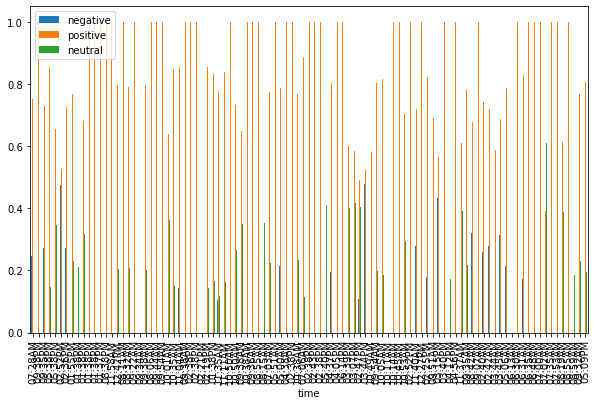

In [ ]:
plot_day.plot.bar()

In [ ]:
parsed_and_scored_news

,ticker,date,time,headline,neg,neu,pos,compound
0,AMZN,2022-02-09,05:55PM,Worried About Another Market Downturn? Here's ...,0.167,0.833,0.000,-0.2960
1,AMZN,2022-02-09,05:14PM,Disney Stock Pops As Earnings Top Amid Theme P...,0.000,0.683,0.317,0.6249
2,AMZN,2022-02-09,04:45PM,Will Affirm Stock Surprise With Amazon-Driven ...,0.000,0.792,0.208,0.2732
3,AMZN,2022-02-09,04:03PM,Don't Expect Big Gains From This Stock Market ...,0.169,0.831,0.000,-0.2584
4,AMZN,2022-02-09,03:20PM,Could This Unstoppable Stock have 100% or More...,0.184,0.816,0.000,-0.2023
...,...,...,...,...,...,...,...,...
295,GOOG,2022-02-05,08:00AM,Apple Leads Five Stocks Near Buy Points Withou...,0.000,0.846,0.154,0.2057
296,GOOG,2022-02-05,08:00AM,Why Ankr Coin Might Go Sky High,0.000,1.000,0.000,0.0000
297,GOOG,2022-02-05,07:31AM,Facebook was on the defensive for yearsuntil t...,0.000,0.901,0.099,0.0258
298,GOOG,2022-02-05,06:15AM,3 Reasons to Buy Alphabet Stock Before Its Sto...,0.000,1.000,0.000,0.0000


In [ ]:
scored_news_clean = parsed_and_scored_news.drop_duplicates(subset=['ticker','headline'])

In [ ]:
single_day = scored_news_clean.set_index(['ticker','date'])
single_day

time  ... compound
ticker date                 ...         
AMZN   2022-02-09  05:55PM  ...  -0.2960
       2022-02-09  05:14PM  ...   0.6249
       2022-02-09  04:45PM  ...   0.2732
       2022-02-09  04:03PM  ...  -0.2584
       2022-02-09  03:20PM  ...  -0.2023
...                    ...  ...      ...
GOOG   2022-02-06  05:33AM  ...  -0.3818
       2022-02-05  08:00AM  ...   0.2057
       2022-02-05  08:00AM  ...   0.0000
       2022-02-05  07:31AM  ...   0.0258
       2022-02-05  06:15AM  ...   0.0000

[298 rows x 6 columns]

In [ ]:
#single_day = scored_news_clean.set_index(['ticker','date'])
single_day_Amz = single_day.loc['AMZN']
single_day_Amz.head()

,time,headline,neg,neu,pos,compound
date,,,,,,
2022-02-09,05:55PM,Worried About Another Market Downturn? Here's ...,0.167,0.833,0.000,-0.2960
2022-02-09,05:14PM,Disney Stock Pops As Earnings Top Amid Theme P...,0.000,0.683,0.317,0.6249
2022-02-09,04:45PM,Will Affirm Stock Surprise With Amazon-Driven ...,0.000,0.792,0.208,0.2732
2022-02-09,04:03PM,Don't Expect Big Gains From This Stock Market ...,0.169,0.831,0.000,-0.2584
2022-02-09,03:20PM,Could This Unstoppable Stock have 100% or More...,0.184,0.816,0.000,-0.2023


In [ ]:
#single_day = scored_news_clean.set_index(['ticker','date'])
single_day_Goog = single_day.loc['GOOG']
single_day_Goog.head()

,time,headline,neg,neu,pos,compound
date,,,,,,
2022-02-09,04:56PM,Super Bowl: NFL 'games and player storylines' ...,0.000,0.635,0.365,0.7845
2022-02-09,04:40PM,Even Meta and Alphabet Don't Make This Sector ...,0.000,0.672,0.328,0.5994
2022-02-09,04:26PM,The No. 1 way cybercriminals use employees to ...,0.249,0.751,0.000,-0.6486
2022-02-09,03:34PM,Microsoft takes swipe at Apple and Google with...,0.000,1.000,0.000,0.0000
2022-02-09,02:29PM,"Fed 'at or approaching peak hawkishness, strat...",0.000,1.000,0.000,0.0000



## **Sentiment Analysis of Stock News**

In [ ]:
!pip install selenium

  Using cached urllib3-1.26.8-py2.py3-none-any.whl (138 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.11
    Uninstalling urllib3-1.25.11:
      Successfully uninstalled urllib3-1.25.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.8 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!pip install --upgrade mplfinance

In [ ]:
# Import all necessary libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
from selenium import webdriver
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.metrics.pairwise import linear_kernel
import re
import string
from wordcloud import WordCloud
from collections import Counter
from PIL import Image
import numpy as np
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from pandas_datareader import data
#import mplfinance as mpf
import sys
from mplfinance.original_flavor import candlestick_ohlc
from math import pi
import statsmodels.api as sm

In [ ]:
# Web scrapping financial news urls from thestreet.com 
def get_news(stock):
    
    req = Request(url='https://finviz.com/quote.ashx?t='+stock, headers={'user-agent': 'my-app/0.0.1'})
    response = urlopen(req)
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    stock_tr = news_table.findAll('tr')
    for i, table_row in enumerate(stock_tr):
        # Read the text of the element 'a' into 'link_text'
        a_text = table_row.a.text
        # Read the text of the element 'td' into 'data_text'
        td_text = table_row.td.text
    parsed_news = [['Stock', 'Date', 'Time', 'Headline']]

    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 1:
            time = date_scrape[0]

        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]

        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([stock, date, time, text])
    df = pd.DataFrame(parsed_news[1:], columns=parsed_news[0])
    df.Date = pd.to_datetime(df.Date)
    df.Time = pd.to_datetime(df.Time, format='%I:%M%p').dt.time
    
    return df

In [ ]:
def clean_news(text):
    
    stopwords_set = set(stopwords.words('english'))
    #Remove punctuations and stopwords
    cleaned = " ".join([i for i in re.sub(r'[^\w\s]', " ", text).lower().split() if i not in stopwords_set])
    # Remove single characters from the start
    cleaned = re.sub(r'\^[a-zA-Z]\s+', ' ', cleaned) 
    # Remove single characters
    cleaned = re.sub(r'\s+[a-zA-Z]\s+', ' ', cleaned)
    # Remove words with containing numbers
    cleaned = re.sub('\w*\d\w*', '', cleaned)
    
    return cleaned

In [ ]:
def ssa_generator(stock):
    
    # Web-scrapping stock news from Finviz.com website into Pandas Dataframe
    df = get_news(stock)
    # Generate cleaned news headline dataframe
    news_clean = pd.DataFrame(df.Headline.apply(clean_news))
    # Rename news column to cleaned news
    news_clean['Cleaned_News'] = news_clean.Headline
    # add the cleaned news column into the original dataframe
    df = df.join(news_clean['Cleaned_News'], rsuffix='_right') 
    # Instantiate the vader sentiment intensity analyzer
    vader = SentimentIntensityAnalyzer()
    # Iterate through the headlines and get the polarity scores using vader
    stock_scores = df['Cleaned_News'].apply(vader.polarity_scores).tolist()
    # Convert the 'scores' list of dicts into a DataFrame
    stock_scores_df = pd.DataFrame(stock_scores)
    # Join the DataFrames of the news and the list of dicts
    final_df = df.join(stock_scores_df, rsuffix='_right')
    
    return final_df

In [ ]:
# Generate news dataframe for stock AMAZON
amzn = ssa_generator('AMZN')
amzn

,Stock,Date,Time,Headline,Cleaned_News,neg,neu,pos,compound
0,AMZN,2022-02-09,17:55:00,Worried About Another Market Downturn? Here's ...,worried another market downturn investors focu...,0.268,0.732,0.000,-0.2960
1,AMZN,2022-02-09,17:14:00,Disney Stock Pops As Earnings Top Amid Theme P...,disney stock pops earnings top amid theme park...,0.000,0.662,0.338,0.6249
2,AMZN,2022-02-09,16:45:00,Will Affirm Stock Surprise With Amazon-Driven ...,affirm stock surprise amazon driven beat raise,0.000,0.568,0.432,0.4215
3,AMZN,2022-02-09,16:03:00,Don't Expect Big Gains From This Stock Market ...,expect big gains stock market sector,0.000,0.676,0.324,0.3400
4,AMZN,2022-02-09,15:20:00,Could This Unstoppable Stock have 100% or More...,could unstoppable stock upside,0.375,0.625,0.000,-0.2023
...,...,...,...,...,...,...,...,...,...
95,AMZN,2022-02-07,16:00:00,US STOCKS-Wall Street ends lower as Meta weighs,us stocks wall street ends lower meta weighs,0.239,0.761,0.000,-0.2960
96,AMZN,2022-02-07,15:53:00,3 Bargain Stocks You Can Buy Today and Hold Fo...,bargain stocks buy today hold forever,0.000,0.735,0.265,0.2023
97,AMZN,2022-02-07,15:28:00,Why Peloton Stock Was Surging Today,peloton stock surging today,0.000,1.000,0.000,0.0000
98,AMZN,2022-02-07,14:56:00,Meta has 'dark days' ahead: analyst,meta dark days ahead analyst,0.000,1.000,0.000,0.0000


In [ ]:
amzn.to_csv('amzn.csv')

In [ ]:
from google.colab import files
files.download("amzn.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Generate news dataframe for stock GOOGLE
google = ssa_generator('GOOG')
google

,Stock,Date,Time,Headline,Cleaned_News,neg,neu,pos,compound
0,GOOG,2022-02-09,16:56:00,Super Bowl: NFL 'games and player storylines' ...,super bowl nfl games player storylines drive s...,0.000,0.615,0.385,0.7845
1,GOOG,2022-02-09,16:40:00,Even Meta and Alphabet Don't Make This Sector ...,even meta alphabet make sector blockbuster,0.000,0.562,0.438,0.5994
2,GOOG,2022-02-09,16:26:00,The No. 1 way cybercriminals use employees to ...,way cybercriminals use employees attack offic...,0.256,0.744,0.000,-0.4767
3,GOOG,2022-02-09,15:34:00,Microsoft takes swipe at Apple and Google with...,microsoft takes swipe apple google new app sto...,0.000,1.000,0.000,0.0000
4,GOOG,2022-02-09,14:29:00,"Fed 'at or approaching peak hawkishness, strat...",fed approaching peak hawkishness strategist says,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...
95,GOOG,2022-02-05,08:00:00,Apple Leads Five Stocks Near Buy Points Withou...,apple leads five stocks near buy points withou...,0.000,0.832,0.168,0.2057
96,GOOG,2022-02-05,08:00:00,Why Ankr Coin Might Go Sky High,ankr coin might go sky high,0.000,1.000,0.000,0.0000
97,GOOG,2022-02-05,07:31:00,Facebook was on the defensive for yearsuntil t...,facebook defensive yearsuntil metaverse came a...,0.000,0.820,0.180,0.0258
98,GOOG,2022-02-05,06:15:00,3 Reasons to Buy Alphabet Stock Before Its Sto...,reasons buy alphabet stock stock split,0.000,1.000,0.000,0.0000


In [ ]:
# Generate news dataframe for stock TESLA
tesla = ssa_generator('TSLA')
tesla

,Stock,Date,Time,Headline,Cleaned_News,neg,neu,pos,compound
0,TSLA,2022-02-09,17:09:00,"Tesla Stock Rises Despite Lawsuits, FSD Hazards",tesla stock rises despite lawsuits fsd hazards,0.000,0.806,0.194,0.1139
1,TSLA,2022-02-09,16:56:00,Why Joe Biden and Tesla CEO Elon Musk are beefing,joe biden tesla ceo elon musk beefing,0.000,1.000,0.000,0.0000
2,TSLA,2022-02-09,16:12:00,Biden pushes for Build Back Better in meeting ...,biden pushes build back better meeting utility...,0.000,0.791,0.209,0.4404
3,TSLA,2022-02-09,15:40:00,ARK Invest Stocks To Buy And Watch: 7 Stocks T...,ark invest stocks buy watch stocks cathie woo...,0.000,1.000,0.000,0.0000
4,TSLA,2022-02-09,15:15:00,California Threatens to Sue Tesla Over Racial ...,california threatens sue tesla racial discrimi...,0.504,0.496,0.000,-0.7269
...,...,...,...,...,...,...,...,...,...
95,TSLA,2022-02-07,09:22:00,"Tesla discloses SEC subpoena, to see if it is ...",tesla discloses sec subpoena see complying set...,0.000,1.000,0.000,0.0000
96,TSLA,2022-02-07,08:32:00,Tesla's bitcoin holding valued at nearly $2 bi...,tesla bitcoin holding valued nearly billion end,0.000,0.674,0.326,0.4404
97,TSLA,2022-02-07,08:11:00,Dow Jones Futures Rise With Market Rally At Ke...,dow jones futures rise market rally key point ...,0.000,1.000,0.000,0.0000
98,TSLA,2022-02-07,08:06:00,"Tesla hired more than 28,500 full-time employe...",tesla hired full time employees,0.000,1.000,0.000,0.0000


In [ ]:
def daily_ssa_generator(stock):
    
    # Web-scrapping stock news from Finviz.com website into Pandas Dataframe
    df = get_news(stock)
    # Generate group by date Dataframe
    gbd_df = df.groupby(df.Date).size().reset_index(name='count')
    # Change Date column from Datetime Object to String
    gbd_df.Date = gbd_df.Date.astype(str)
    # Import Yahoo Finance data using DateReader
    daily_df = data.DataReader(stock, 
                       start='2020-12-20', 
                       end='2021-1-11', 
                       data_source='yahoo')
    # Keep necessary columns for further analysis
    daily_df = daily_df[['Open','High','Low','Adj Close','Volume']].reset_index()
    # Create price change column
    daily_df['Price Change'] = daily_df['Adj Close'].pct_change().fillna(0)
    # Create volume change column
    daily_df['Volume Change'] = daily_df['Volume'].pct_change().fillna(0)
    # Change Date column from Datetime Object into String to match gbd_df
    daily_df.Date = daily_df.Date.astype(str)
    # Merge daily_df with gbd_df on Date column
    daily_df = daily_df.merge(gbd_df, how='left',on='Date').fillna(0)
    # Calculate mean scores for all columns
    daily_mean_scores = ssa_generator(stock).groupby(['Date']).mean().unstack()
    # Generate daily Textbolb Sentiment Score
    # daily_blob_mean_score = daily_mean_scores.xs('Polarity').transpose()
    # daily_blob_mean_score = pd.DataFrame({'Date':daily_blob_mean_score.index, 'blob score':daily_blob_mean_score.values})
    # daily_blob_mean_score.Date = daily_blob_mean_score.Date.astype(str)
    # Generate daily Vader Sentiment Score
    daily_vader_mean_score = daily_mean_scores.xs('compound').transpose()
    daily_vader_mean_score = pd.DataFrame({'Date':daily_vader_mean_score.index, 'vader score':daily_vader_mean_score.values})
    daily_vader_mean_score.Date = daily_vader_mean_score.Date.astype(str)
    # Add daily Textbolb Score column
    #daily_df = daily_df.merge(daily_blob_mean_score, how='left',on='Date').fillna(0)
    # Add daily Vader Score column
    daily_df = daily_df.merge(daily_vader_mean_score, how='left',on='Date').fillna(0)
    
    return daily_df

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [ ]:
# Import Google financial data from Yahoo Finance using DataReader into Pandas DataFrame
yahoo_g = data.DataReader("GOOG", 
                            start='2020-12-20', 
                            end='2021-1-11', 
                            data_source='yahoo')
yahoo_g

RemoteDataError: ignored

In [ ]:
# Import AMAZON financial data from Yahoo Finance using DataReader into Pandas DataFrame
yahoo_amzn = data.DataReader("AMZN", 
                            start='2020-12-20', 
                            end='2022-1-11', 
                            data_source='yahoo')
yahoo_amzn

In [ ]:
# Import TESLA financial data from Yahoo Finance using DataReader into Pandas DataFrame
yahoo_tesla = data.DataReader("TSLA", 
                            start='2020-12-20', 
                            end='2021-1-11', 
                            data_source='yahoo')
yahoo_tesla

In [ ]:
# Generate daily AMAZON news dataframe with both Textbolb and Vader Sentiment Score
daily_amzn = daily_ssa_generator('AMZN')
daily_amzn

RemoteDataError: ignored

In [ ]:
daily_amzn1 = daily_amzn.copy()

In [ ]:
daily_amzn1.to_csv('daily_amzn1.csv')
from google.colab import files
files.download("daily_amzn1.csv")

In [ ]:
# Generate daily TESLA news dataframe with both Textbolb and Vader Sentiment Score
daily_tesla = daily_ssa_generator('TSLA')
daily_tesla

In [ ]:
# Generate daily GOOGLE news dataframe with both Textbolb and Vader Sentiment Score
daily_google = daily_ssa_generator('GOOG')
daily_google

In [ ]:
!pip install --upgrade mplfinance

In [ ]:
from mplfinance.original_flavor import candlestick_ohlc
import numpy as np
import mpmath as mp
import matplotlib.pyplot as plt
import mplfinance as mpf

In [ ]:
# Create candlestick plot with vader sentiment score of AMAZON
apd_amzn = mpf.make_addplot(daily_amzn['vader score'],panel='lower',color='b', ylim=[-0.5,0.5], ylabel='Sentiment Score')
saving_params = dict(fname='amzn_mpf.png', dpi=300)
mpf.plot(yahoo_amzn, addplot=apd_amzn, type='candle',style='yahoo',
            title='AMAZON, 12/20/20 - 1/11/21',
            ylabel='Price ($)',
            ylabel_lower='Shares \nTraded',
            volume=True,
            savefig=saving_params)

In [ ]:
# Create candlestick plot with vader sentiment score of GOOGLE
apd_google = mpf.make_addplot(daily_google['vader score'],panel='lower',color='b', ylim=[-0.5,0.5], ylabel='Sentiment Score')
saving_params2 = dict(fname='google_mpf.png', dpi=300)
mpf.plot(yahoo_g, addplot=apd_google, type='candle',style='yahoo',
            title='GOOGLE, 12/20/20 - 1/11/21',
            ylabel='Price ($)',
            ylabel_lower='Shares \nTraded',
            volume=True,
            savefig=saving_params2)

In [ ]:
# Create candlestick plot with vader sentiment score of LI
apd_tesla = mpf.make_addplot(daily_tesla['vader score'],panel='lower',color='b', ylim=[-0.5,0.5], ylabel='Sentiment Score')
saving_params3 = dict(fname='tesla_mpf.png', dpi=300)
mpf.plot(yahoo_tesla, addplot=apd_tesla, type='candle',style='yahoo',
            title='TESLA, 12/20/20 - 1/11/21',
            ylabel='Price ($)',
            ylabel_lower='Shares \nTraded',
            volume=True,
            savefig=saving_params3)

In [ ]:
# Create bag of words of AMAZON
bow_amzn = ''.join(amzn['Cleaned_News']).split()
# Print out top 40 most common words of NIO
print('AMAZON'+': ' + f' \n {Counter(bow_amzn).most_common(40)}')
add_stop_words = [word for word, count in Counter(bow_amzn).most_common() if count > 20]
remove = ['also', 'was', 'more', 'will', 'by', 'or']
for word in remove:
    add_stop_words.append(word)
stop_words = ENGLISH_STOP_WORDS.union(add_stop_words)
wc_words = [word for word in bow_amzn if word not in add_stop_words]
wc_words_counts = Counter(wc_words).most_common(50)
counter = pd.DataFrame(wc_words_counts,columns=('word','count'))
plot = counter.iloc[:10].plot.barh(x='word', y='count', color = 'blue', figsize=(10,7), legend=False, edgecolor='k')
_ = plt.xlabel('Count')
_ = plt.title('Top 10 Most Common Words of AMAZON News')


ax1 = plt.axes()
y_ax = ax1.axes.get_yaxis()
y_ax.label.set_visible(False)

plt.gca().invert_yaxis()
plt.savefig('amzn_bow.png', dpi=300)

In [ ]:
# Create bag of words of GOOGLE
bow_google = ''.join(google['Cleaned_News']).split()
print('GOOGLE'+': ' + f' \n {Counter(bow_google).most_common(40)}')
add_stop_words = [word for word, count in Counter(bow_google).most_common() if count > 20]
remove = ['also', 'was', 'more', 'will', 'by', 'or']
for word in remove:
    add_stop_words.append(word)
stop_words = ENGLISH_STOP_WORDS.union(add_stop_words)
wc_words = [word for word in bow_google if word not in add_stop_words]
wc_words_counts = Counter(wc_words).most_common(50)
counter = pd.DataFrame(wc_words_counts,columns=('word','count'))
plot = counter.iloc[:10].plot.barh(x='word', y='count', color = 'green', figsize=(10,7), legend=False, edgecolor='k')
_ = plt.xlabel('Count')
_ = plt.title('Top 10 Most Common Words of GOOGLE News')


ax1 = plt.axes()
y_ax = ax1.axes.get_yaxis()
y_ax.label.set_visible(False)

plt.gca().invert_yaxis()
plt.savefig('google_bow.png', dpi=300)

In [ ]:
# Create bag of words of TESLA
bow_tesla = ''.join(tesla['Cleaned_News']).split()
print('TESLA'+': ' + f' \n {Counter(bow_tesla).most_common(40)}')
add_stop_words = [word for word, count in Counter(bow_tesla).most_common() if count > 20]
remove = ['also', 'was', 'more', 'will', 'by', 'or']
for word in remove:
    add_stop_words.append(word)
stop_words = ENGLISH_STOP_WORDS.union(add_stop_words)
wc_words = [word for word in bow_tesla if word not in add_stop_words]
wc_words_counts = Counter(wc_words).most_common(50)
counter = pd.DataFrame(wc_words_counts,columns=('word','count'))
plot = counter.iloc[:10].plot.barh(x='word', y='count', color = 'purple', figsize=(10,7), legend=False, edgecolor='k')
_ = plt.xlabel('Count')
_ = plt.title('Top 10 Most Common Words of TESLA News')


ax1 = plt.axes()
y_ax = ax1.axes.get_yaxis()
y_ax.label.set_visible(False)

plt.gca().invert_yaxis()
plt.savefig('tesla_bow.png', dpi=300)

In [ ]:
# Conduct OLS Regression between vader sentiment score and next day's stock price change of AMAZON
X = daily_amzn['Volume Change'][0:-1]
y = daily_amzn['Price Change'][1:].reset_index(drop=True)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

In [ ]:
# Conduct OLS Regression between vader sentiment score and next day's stock price change of GOOGLE
X2 = daily_google['Volume Change'][0:-1]
y2 = daily_google['Price Change'][1:].reset_index(drop=True)
model2 = sm.OLS(y2, X2).fit()
predictions2 = model2.predict(X2)
model2.summary()

In [ ]:
# Conduct OLS Regression between vader sentiment score and next day's stock price change of TESLA
X3 = daily_tesla['Volume Change'][0:-1]
y3 = daily_tesla['Price Change'][1:].reset_index(drop=True)
model3 = sm.OLS(y2, X2).fit()
predictions3 = model3.predict(X3)
model3.summary()

In [ ]:
plt.scatter(X, y, color = "red")
plt.plot(X, predictions, color = "green")
plt.title("AMAZON price change vs sentiment score")
ymin, ymax = plt.ylim()
plt.ylim(ymin * 5, ymax * 5)

plt.xlabel("Daily Sentiment Score")
plt.ylabel("Price Change in percentage")
plt.savefig('amzn_cor.png', dpi=300)
plt.show()

In [ ]:
plt.scatter(X2, y2, color = "red")
plt.plot(X2, predictions2, color = "green")
plt.title("GOOGLE price change vs sentiment score")
ymin, ymax = plt.ylim()
plt.ylim(ymin * 5, ymax * 5)

plt.xlabel("Daily Sentiment Score")
plt.ylabel("Price Change in percentage")
plt.savefig('google_cor.png', dpi=300)
plt.show()

In [ ]:
plt.scatter(X3, y3, color = "red")
plt.plot(X, predictions3, color = "green")
plt.title("TESLA price change vs sentiment score")
ymin, ymax = plt.ylim()
plt.ylim(ymin * 5, ymax * 5)

plt.xlabel("Daily Sentiment Score")
plt.ylabel("Price Change in percentage")
plt.savefig('tesla_cor.png', dpi=300)
plt.show()

## **Goals:**



*   **Sentiment Score vs Stock Price Change:** plot the sentiment score of all three stocks, and try to see if the sentiment score of one particular stock have any correlation with the next day’s price movement.

